In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [2]:
dataroot = "D:\\PROJECTS\\UMAR\\Phase_II\\Data\\chem\\"
pumping = pd.read_excel(dataroot + "MillvilleMaster.xlsx","PumpingSchedule")

In [3]:
pumping.columns

Index([                            u'Date-time',
       u'Pipe Meter Reading (gallons of water)',
              u'Total Water Injected (gallons)',
              u'Total Water Injected (acre-ft)',
                            u'Percent GR Water',
                          u'Percent Garr Water',
                                  u'Time delta',
                                  u'Flow delta',
                          u'Average Rate (gpm)',
         u'Time since injection started (days)',
                           u'Pumping/Injection',
                                     u'Comment',
                                       u'Hours'],
      dtype='object')

In [17]:
?plt.plot()

In [5]:
nitrate = pd.read_excel(dataroot + "MillvilleMaster.xlsx","NitrateOverTime")
nitrate.columns

Index([u'Source', u'SampleDate', u'ResultValue'], dtype='object')

In [6]:
nitrate.drop_duplicates(subset=['Source','SampleDate'], inplace=True)
nit =  nitrate.pivot(index='SampleDate', columns='Source', values='ResultValue')
nit = nit.resample('1H')
nit = nit.interpolate(method='time')
nit = nit.resample('1D')

In [7]:
nit

Source,400S Well Providence,Alder Well,Arnold,Dales Well,Glenridge,Matthews,USGS-414141111493601,USU
SampleDate,,,,,,,,
1966-08-31,NaN,NaN,NaN,2.479926,NaN,NaN,NaN,NaN
1966-09-01,NaN,NaN,NaN,2.479770,NaN,NaN,NaN,NaN
1966-09-02,NaN,NaN,NaN,2.479615,NaN,NaN,NaN,NaN
1966-09-03,NaN,NaN,NaN,2.479460,NaN,NaN,NaN,NaN
1966-09-04,NaN,NaN,NaN,2.479305,NaN,NaN,NaN,NaN
1966-09-05,NaN,NaN,NaN,2.479150,NaN,NaN,NaN,NaN
1966-09-06,NaN,NaN,NaN,2.478995,NaN,NaN,NaN,NaN
1966-09-07,NaN,NaN,NaN,2.478839,NaN,NaN,NaN,NaN
1966-09-08,NaN,NaN,NaN,2.478684,NaN,NaN,NaN,NaN


In [10]:
nitrate.reset_index(inplace=True)
nitrate.set_index(['SampleDate'], inplace=True)


In [11]:
pumping.reset_index(inplace=True)
pumping.set_index('Date-time',inplace=True)
pump = pumping.resample('1H')
pump = pump.interpolate(method='time')
pump = pump.resample('1D')

In [13]:
pumpNnit.columns

Index([                 u'400S Well Providence',
                                  u'Alder Well',
                                      u'Arnold',
                                  u'Dales Well',
                                   u'Glenridge',
                                    u'Matthews',
                        u'USGS-414141111493601',
                                         u'USU',
                                       u'index',
       u'Pipe Meter Reading (gallons of water)',
              u'Total Water Injected (gallons)',
              u'Total Water Injected (acre-ft)',
                            u'Percent GR Water',
                          u'Percent Garr Water',
                                  u'Time delta',
                                  u'Flow delta',
                          u'Average Rate (gpm)',
         u'Time since injection started (days)',
                                       u'Hours'],
      dtype='object', name=u'Source')

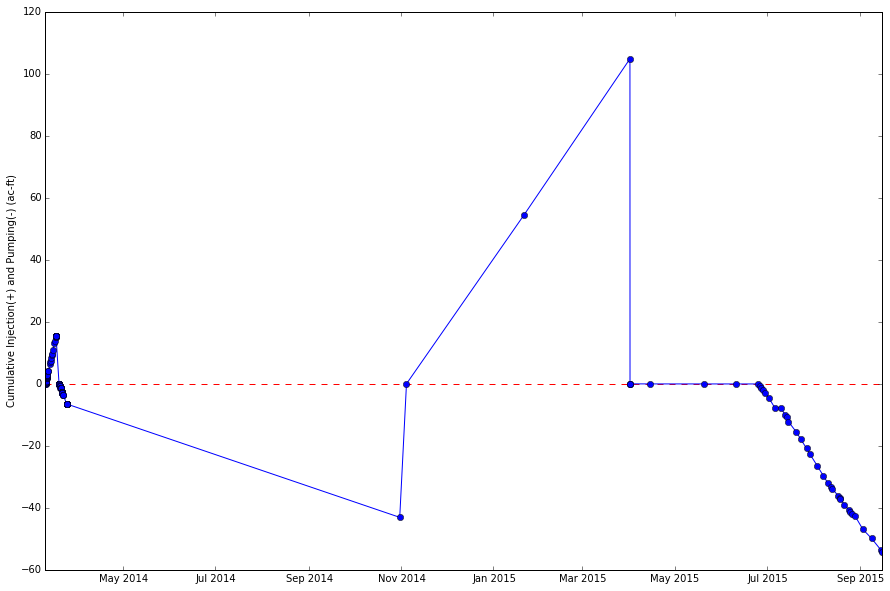

In [29]:
x = pumping.index
y = pumping['Percent GR Water']
y1 = pumping['Total Water Injected (acre-ft)']
plt.figure()
plt.plot(x,y1,'bo-')
plt.ylabel('Cumulative Injection(+) and Pumping(-) (ac-ft)')
plt.hlines(y=0,xmin=min(x),xmax=max(x),linestyles='dashed',colors='red')

In [12]:
pumpNnit = pd.merge(nit,pump,left_index=True,right_index=True,how='inner')

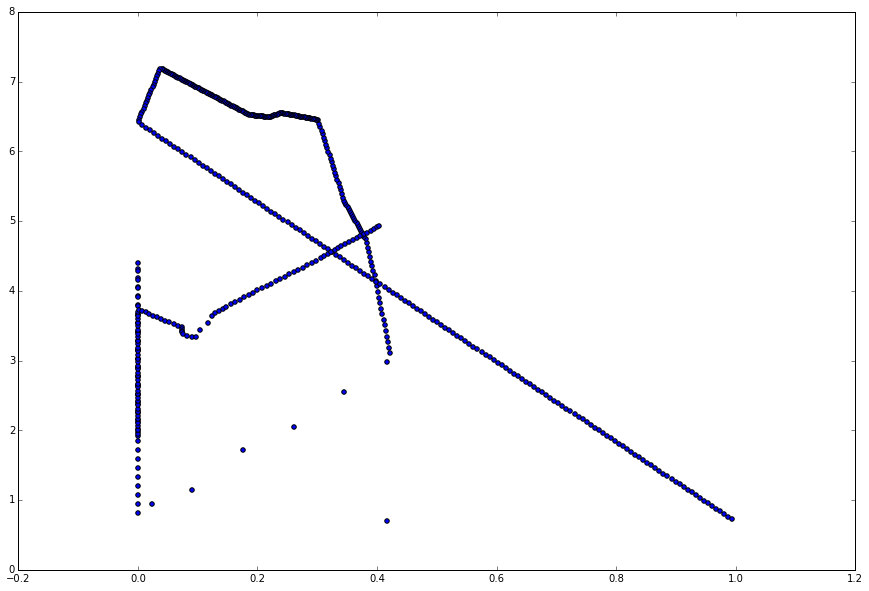

In [15]:
xnit = pumpNnit['Percent GR Water']
ynit = pumpNnit['Glenridge']

plt.scatter(xnit,ynit)

In [104]:
nit = nit[nit.index >= datetime.datetime(2014,3,8)]

Source,400S Well Providence,Alder Well,Arnold,Dales Well,Glenridge,Matthews,USGS-414141111493601,USU
SampleDate,,,,,,,,
2013-01-01,2.84,3.854637,NaN,2.71,7.919842,6.552144,3.862661,1.203947
2013-01-02,2.84,3.857276,NaN,2.71,7.920684,6.550722,3.862661,1.203654
2013-01-03,2.84,3.859916,NaN,2.71,7.921526,6.549301,3.862661,1.203361
2013-01-04,2.84,3.862555,NaN,2.71,7.922368,6.547879,3.862661,1.203068
2013-01-05,2.84,3.865194,NaN,2.71,7.923210,6.546458,3.862661,1.202775
2013-01-06,2.84,3.867834,NaN,2.71,7.924051,6.545036,3.862661,1.202482
2013-01-07,2.84,3.870473,NaN,2.71,7.924893,6.543615,3.862661,1.202189
2013-01-08,2.84,3.873112,NaN,2.71,7.925735,6.542194,3.862661,1.201896
2013-01-09,2.84,3.875751,NaN,2.71,7.926577,6.540772,3.862661,1.201603


In [20]:
nitrate.columns

Index([u'index', u'Source', u'ResultValue'], dtype='object')

In [21]:
del(nitrate['index'])

In [22]:
print pumping[pumping['Pumping/Injection']=='Pumping']

                     index  Pipe Meter Reading (gallons of water)  \
Date-time                                                           
2014-03-19 10:18:00     57                              398221530   
2014-03-19 10:24:40     58                              398223500   
2014-03-19 10:25:00     59                              398223600   
2014-03-19 10:25:19     60                              398223700   
2014-03-19 10:25:39     61                              398223800   
2014-03-19 10:26:22     62                              398224000   
2014-03-19 10:26:43     63                              398224100   
2014-03-19 10:27:03     64                              398224200   
2014-03-19 10:27:25     65                              398224300   
2014-03-19 10:27:46     66                              398224400   
2014-03-19 10:28:45     67                              398224700   
2014-03-19 10:29:06     68                              398224800   
2014-03-19 10:31:00     69        

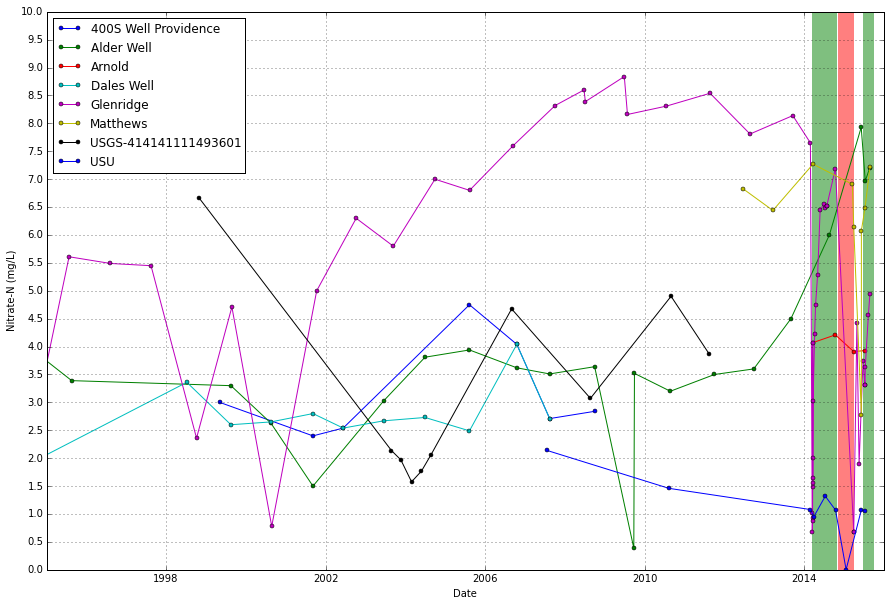

In [27]:
for key, grp in nitrate.groupby('Source'):
    plt.plot(grp.index, grp['ResultValue'],'-o',label=key, markersize=4) 
    plt.legend(loc='best')
plt.xlim('1/1/1995','1/1/2016')
plt.xlabel('Date')
plt.ylabel('Nitrate-N (mg/L)')
plt.ylim(0,10)

# Inject
## Phase I
a = '3/10/2014 11:02'
b = '3/19/2014 9:15'
## Phase II
c = '11/4/2014  11:16'
d = '4/1/2015 10:47'

# Pump
a1 = '3/19/2014 10:18'
b1 = '10/31/2014 0:00'
c1 = '6/25/2015 9:00'
d1 = '10/1/2015 0:00'

fmt = '%m/%d/%Y %H:%M'
a1 = datetime.datetime.strptime(a1,fmt)
b1 = datetime.datetime.strptime(b1,fmt)
c1 = datetime.datetime.strptime(c1,fmt)
d1 = datetime.datetime.strptime(d1,fmt)

a = datetime.datetime.strptime(a,fmt)
b = datetime.datetime.strptime(b,fmt)
c = datetime.datetime.strptime(c,fmt)
d = datetime.datetime.strptime(d,fmt)


plt.axvspan(a, b, color='r', alpha=0.5, lw=0)
plt.axvspan(c, d, color='r', alpha=0.5, lw=0)
plt.axvspan(a1, b1, color='g', alpha=0.5, lw=0)
plt.axvspan(c1, d1, color='g', alpha=0.5, lw=0)

plt.yticks(np.arange(0,10.5,0.5))
plt.grid()

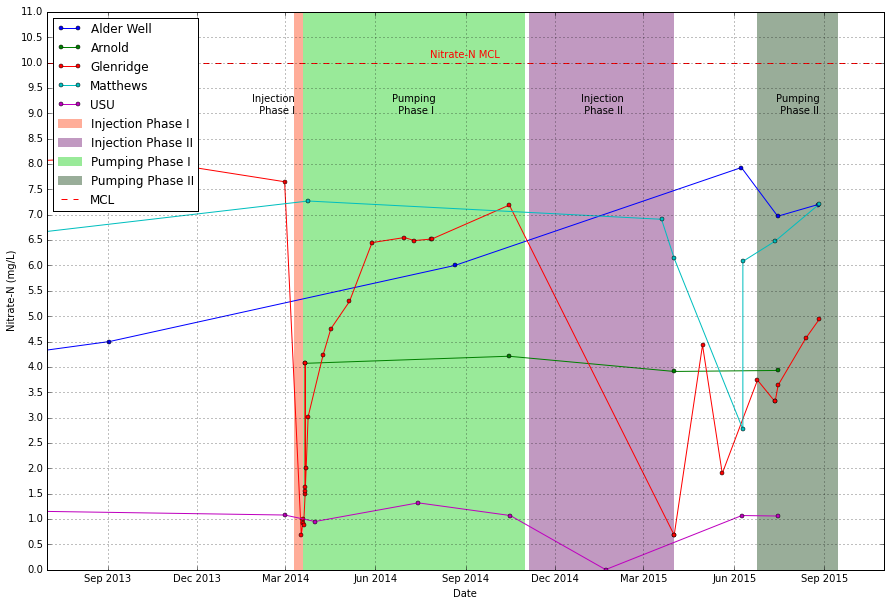

In [26]:
import datetime
for key, grp in nitrate.groupby('Source'):
    if grp.index.max() > datetime.datetime(2015,1,1):
        plt.plot(grp.index, grp['ResultValue'],'-o',label=key, markersize=4)

ly = 9.0
tmin = datetime.datetime.strptime('7/1/2013','%m/%d/%Y')
tmax = datetime.datetime.strptime('11/1/2015','%m/%d/%Y')

plt.axvspan(a, b, color='#FF3300', alpha=0.4, lw=0, label= 'Injection Phase I')
plt.axvspan(c, d, color='#660066', alpha=0.4, lw=0, label= 'Injection Phase II')
plt.axvspan(a1, b1, color='#00CC00', alpha=0.4, lw=0, label='Pumping Phase I')
plt.axvspan(c1, d1, color='#003300', alpha=0.4, lw=0, label='Pumping Phase II')
plt.text(a, ly, 'Injection \n Phase I', horizontalalignment='right')
plt.text(a1 + (b1 - a1)/2, ly, 'Pumping \n Phase I', horizontalalignment='center')
plt.text(c1 + (d1 - c1)/2, ly, 'Pumping \n Phase II', horizontalalignment='center')
plt.text(c + (d - c)/2, ly, 'Injection \n Phase II', horizontalalignment='center')
plt.text(tmin + (tmax-tmin)/2, 10.1, 'Nitrate-N MCL', color='red', horizontalalignment='center')
plt.xlim(tmin,tmax)
plt.xlabel('Date')
plt.ylabel('Nitrate-N (mg/L)')
plt.hlines(10,'7/1/2013','11/1/2015',color='red',label='MCL',linestyles='dashed')
plt.ylim(0,10.5)
plt.yticks(np.arange(0,11.5,0.5))
plt.legend(loc=2)
plt.grid()

In [28]:
def fcl(df, dtObj):
    '''
    finds closest date index in a dataframe to a date object
    
    df = dataframe
    dtObj = date object
    
    taken from: http://stackoverflow.com/questions/15115547/find-closest-row-of-dataframe-to-given-time-in-pandas
    '''
    return df.iloc[np.argmin(np.abs(df.index.to_pydatetime() - dtObj))]

In [43]:
pumping['nitrates'] = pumping.index.apply(lambda x: fcl(nitrate, x),1)

In [23]:
?plt.text